Populating the interactive namespace from numpy and matplotlib


KeyError: 'manual'

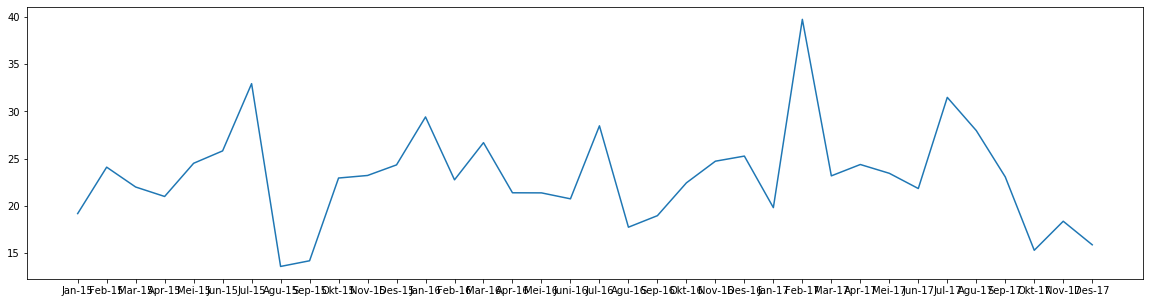

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt

%pylab inline

from pyFTS.data import manual

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[20,5])

df = manual.get_dataframe()
plot(df['waktu'],df['aktual'])

data = df['manual'].values

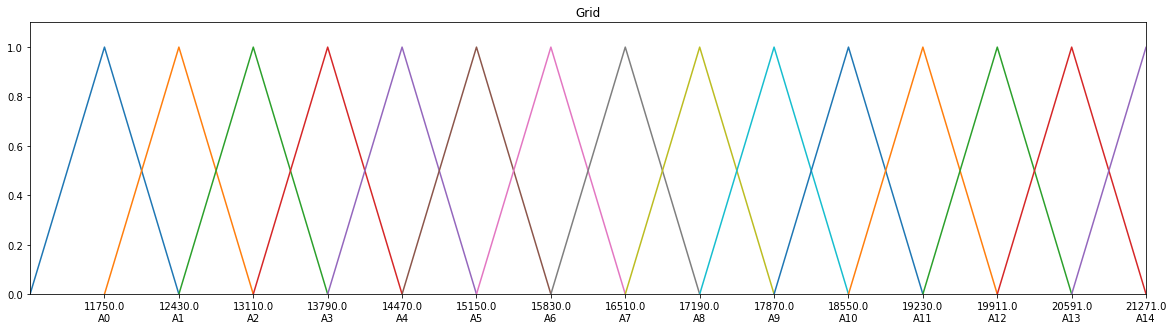

In [24]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=14)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[20,5])

fs.plot(ax)

In [15]:
fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')

fuzzyfied

['A2',
 'A2',
 'A3',
 'A4',
 'A5',
 'A5',
 'A5',
 'A6',
 'A7',
 'A7',
 'A6',
 'A5',
 'A5',
 'A5',
 'A5',
 'A6',
 'A7',
 'A9',
 'A10',
 'A10',
 'A10',
 'A10']

In [16]:
from pyFTS.common import FLR

patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

['A2 -> A2', 'A2 -> A3', 'A3 -> A4', 'A4 -> A5', 'A5 -> A5', 'A5 -> A6', 'A6 -> A7', 'A7 -> A7', 'A7 -> A6', 'A6 -> A5', 'A7 -> A9', 'A9 -> A10', 'A10 -> A10']


In [19]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

Conventional FTS:
A2 -> A2,A3
A3 -> A4
A4 -> A5
A5 -> A5,A6
A6 -> A5,A7
A7 -> A6,A7,A9
A9 -> A10
A10 -> A10



In [29]:
fuzzyfied = fs.fuzzyfy(39.73, method='maximum', mode='sets')

print(fuzzyfied)

A0
